Extend quantum circuits
https://qiskit.org/documentation/stubs/qiskit.extensions.Initialize.html

https://qiskit.org/documentation/tutorials/circuits_advanced/01_advanced_circuits.html
https://www.youtube.com/watch?v=3ja8uCqUS0s
![Doc](resources/Compose.png)
![Doc](resources/Extend_deprecated.png)

![Doc](resources/Decompose.png)

![Doc](resources/Gate.png)
![Doc](resources/Gate-methods.png)
![Doc](resources/Gate-methods2.png)
https://qiskit.org/documentation/tutorials/simulators/4_custom_gate_noise.html
https://qiskit.org/documentation/stubs/qiskit.circuit.Gate.html

In [3]:
import numpy as np
from qiskit import *

In [4]:
from qiskit.circuit import Gate

my_gate = Gate(name='my_gate', num_qubits=2, params=[])

qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(qr)
circ.append(my_gate, [qr[0], qr[1]])
circ.append(my_gate, [qr[1], qr[2]])

circ.draw()

┌──────────┐            
q_0: ┤0         ├────────────
     │  my_gate │┌──────────┐
q_1: ┤1         ├┤0         ├
     └──────────┘│  my_gate │
q_2: ────────────┤1         ├
                 └──────────┘

In [ ]:
## Composite Gates

In [5]:
# Build a sub-circuit
sub_q = QuantumRegister(2)
sub_circ = QuantumCircuit(sub_q, name='sub_circ')
sub_circ.h(sub_q[0])
sub_circ.crz(1, sub_q[0], sub_q[1])
sub_circ.barrier()
sub_circ.id(sub_q[1])
sub_circ.u3(1, 2, -2, sub_q[0])
sub_circ.draw()

<ipython-input-5-d2410ed8fe7f>:8: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  sub_circ.u3(1, 2, -2, sub_q[0])


┌───┐          ░ ┌────────────┐
q0_0: ┤ H ├────■─────░─┤ U3(1,2,-2) ├
      └───┘┌───┴───┐ ░ └───┬───┬────┘
q0_1: ─────┤ RZ(1) ├─░─────┤ I ├─────
           └───────┘ ░     └───┘

In [6]:
# Convert to a gate and stick it into an arbitrary place in the bigger circuit
sub_inst = sub_circ.to_instruction()

In [9]:
qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(qr)
circ.h(qr[0])
circ.cx(qr[0], qr[1])
circ.cx(qr[1], qr[2])
circ.append(sub_inst, [qr[1], qr[2]])

circ.draw()

┌───┐                       
q_0: ┤ H ├──■────────────────────
     └───┘┌─┴─┐     ┌───────────┐
q_1: ─────┤ X ├──■──┤0          ├
          └───┘┌─┴─┐│  sub_circ │
q_2: ──────────┤ X ├┤1          ├
               └───┘└───────────┘

In [10]:
decomposed_circ = circ.decompose() # Does not modify original circuit
decomposed_circ.draw()

┌─────────┐                                         
q_0: ┤ U2(0,π) ├──■──────────────────────────────────────
     └─────────┘┌─┴─┐     ┌───┐          ░ ┌────────────┐
q_1: ───────────┤ X ├──■──┤ H ├────■─────░─┤ U3(1,2,-2) ├
                └───┘┌─┴─┐└───┘┌───┴───┐ ░ └───┬───┬────┘
q_2: ────────────────┤ X ├─────┤ RZ(1) ├─░─────┤ I ├─────
                     └───┘     └───────┘ ░     └───┘

![Doc](resources/QuantumVolume.png)
![Doc](resources/Question2_4Advocate.png)

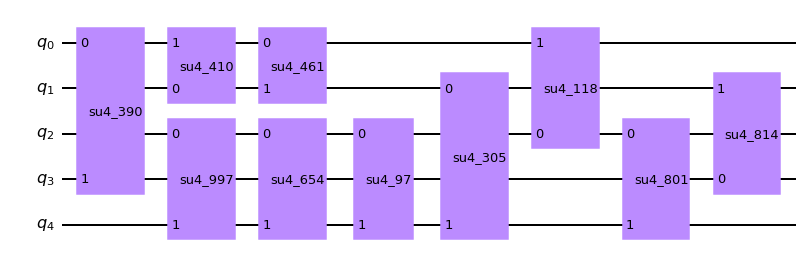

In [1]:
import qiskit.circuit.library as qulib
qc_adv2_1 = qulib.QuantumVolume(num_qubits=5, depth=5)
qc_adv2_2 = qc_adv2_1.decompose()
qc_adv2_2.draw('mpl', fold = 100)

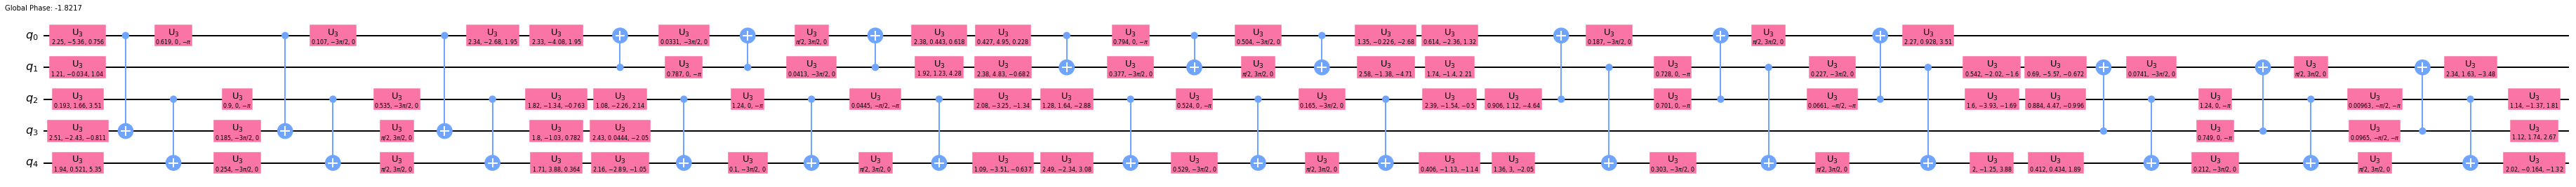

In [2]:
qc_adv2_2 = qc_adv2_2.decompose()
qc_adv2_2.draw('mpl', fold = 100)

In [3]:
print(qc_adv2_2.depth())

35
